In [55]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib

import os
import urllib
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt


# Step 1. 인물모드 직접 해 보기
- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?


(1418, 1080, 3)
(1275, 1080, 3)
(648, 1152, 3)


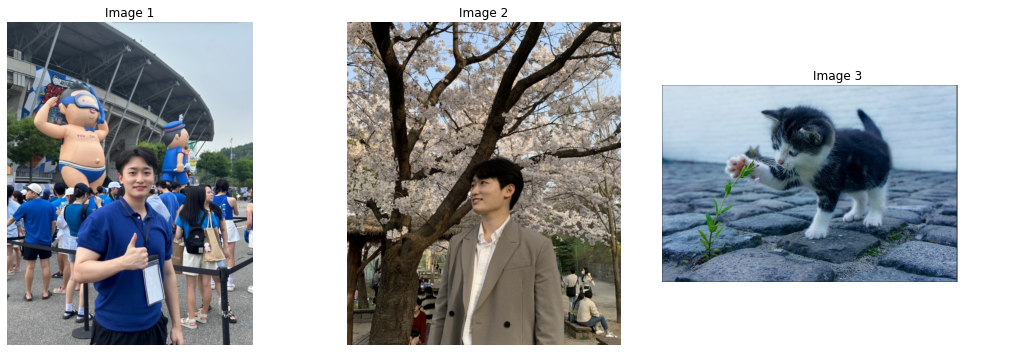

In [56]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path1= os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image1.jpg'  
img_orig1 = cv2.imread(img_path1) 
img_path2= os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image2.jpg'  
img_orig2 = cv2.imread(img_path2) 
img_path3= os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image0.jpg'  
img_orig3 = cv2.imread(img_path3) 

print(img_orig1.shape)
print(img_orig2.shape)
print(img_orig3.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
plt.figure(figsize=(15, 5))  # 그림 크기 조절 (넓게 보여줌)

plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis('off')  # 축 제거

plt.subplot(1, 3, 2)  # 1행 3열 중 두 번째
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)  # 1행 3열 중 세 번째
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.title("Image 3")
plt.axis('off')

plt.tight_layout()  # 여백 자동 정리
plt.show()


In [57]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x74321fd5fb50>)

In [58]:
# PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation() 

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues1, output1 = model.segmentAsPascalvoc(img_path1)
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

In [59]:
#pascalvoc 데이터의 라벨종류

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

len(LABEL_NAMES)

21

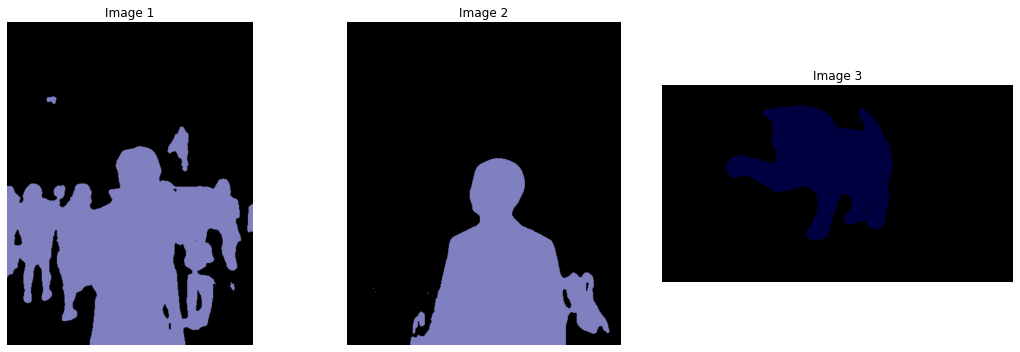

In [60]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력

plt.figure(figsize=(15, 5))  # 그림 크기 조절 (넓게 보여줌)

plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째
plt.imshow(output1)
plt.title("Image 1")
plt.axis('off')  # 축 제거

plt.subplot(1, 3, 2)  # 1행 3열 중 두 번째
plt.imshow(output2)
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)  # 1행 3열 중 세 번째
plt.imshow(output3)
plt.title("Image 3")
plt.axis('off')

plt.tight_layout()  # 여백 자동 정리
plt.show()


In [61]:
outputs = [output1, output2, output3]
segvalues = [segvalues1,segvalues2, segvalues3]
names = ['Image 1', 'Image 2', 'Image 3']

for name, segval in zip(names, segvalues):
    print(f"\n--- {name} ---")
    for class_id in np.unique(segval['class_ids']):
        print(f"{class_id}: {LABEL_NAMES[int(class_id)]}")



--- Image 1 ---
0: background
15: person

--- Image 2 ---
0: background
15: person

--- Image 3 ---
0: background
8: cat


In [62]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력



array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [63]:
colormap[8]

array([64,  0,  0])

In [64]:
colormap[15]

array([192, 128, 128])

In [65]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
# 색상 정보
seg_color_person = (128, 128, 192)  # RGB 기준
seg_color_cat = (0, 0, 64)

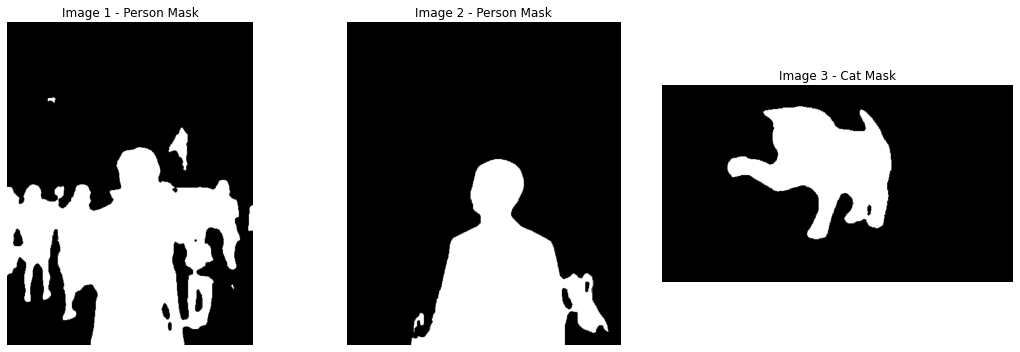

In [66]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
# person 마스크 (RGB 기준)
seg_map1 = np.all(output1 == seg_color_person, axis=-1)
seg_map2 = np.all(output2 == seg_color_person, axis=-1)
seg_map3 = np.all(output3 == seg_color_cat, axis=-1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(seg_map1, cmap='gray')
plt.title('Image 1 - Person Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(seg_map2, cmap='gray')
plt.title('Image 2 - Person Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(seg_map3, cmap='gray')
plt.title('Image 3 - Cat Mask')
plt.axis('off')

plt.tight_layout()
plt.show()


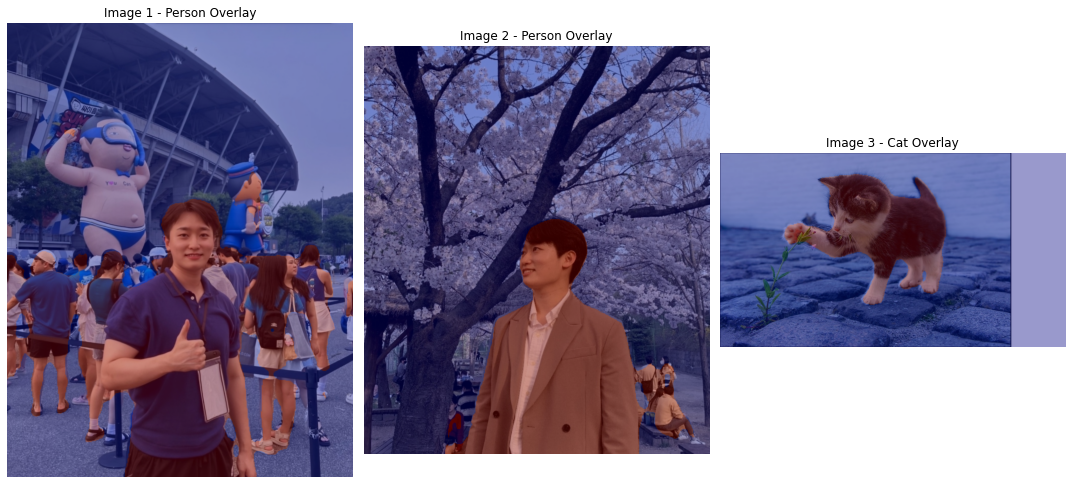

In [67]:
# 원본 이미지 리스트
img_list = [img_orig1, img_orig2, img_orig3]
# 세그먼트 출력 리스트
output_list = [output1, output2, output3]

# 각 이미지에 적용할 대상 클래스 색상 (index 0, 1 → person / 2 → cat)
target_colors = [seg_color_person, seg_color_person, seg_color_cat]

plt.figure(figsize=(15, 10))

for i in range(3):
    img_orig = img_list[i].copy()
    output = output_list[i]
    target_color = target_colors[i]  # 이미지별 타겟 클래스 색상

    # 해당 클래스의 위치만 마스크 생성
    seg_map = np.all(output == target_color, axis=-1)

    # True/False → 255/0 변환
    img_mask = seg_map.astype(np.uint8) * 255

    # 컬러 마스크 생성
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 마스크와 원본 이미지 합성
    img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

    # 시각화
    plt.subplot(1, 3, i + 1)
    title_name = "Person" if i < 2 else "Cat"
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i + 1} - {title_name} Overlay")
    plt.axis('off')

plt.tight_layout()
plt.show()


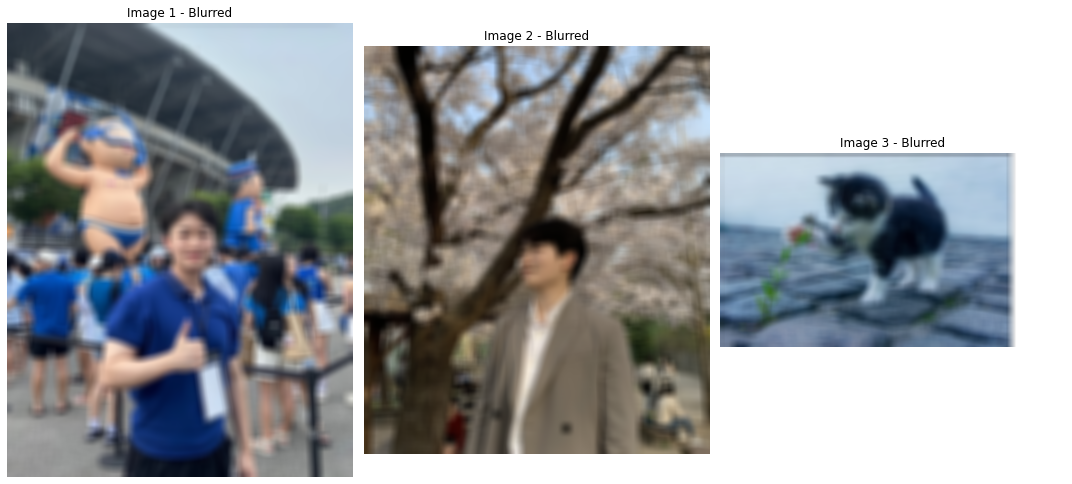

In [68]:
# 블러 처리 결과 저장용 리스트
blurred_imgs = []

# 블러링 커널 사이즈
kernel_size = (30, 30)

plt.figure(figsize=(15, 10))

for i in range(3):
    img_orig = img_list[i]
    
    # Blur 처리
    img_blur = cv2.blur(img_orig, kernel_size)
    blurred_imgs.append(img_blur)
    
    # 이미지 시각화
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i + 1} - Blurred")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 직관적으로 np.where 안쓰고

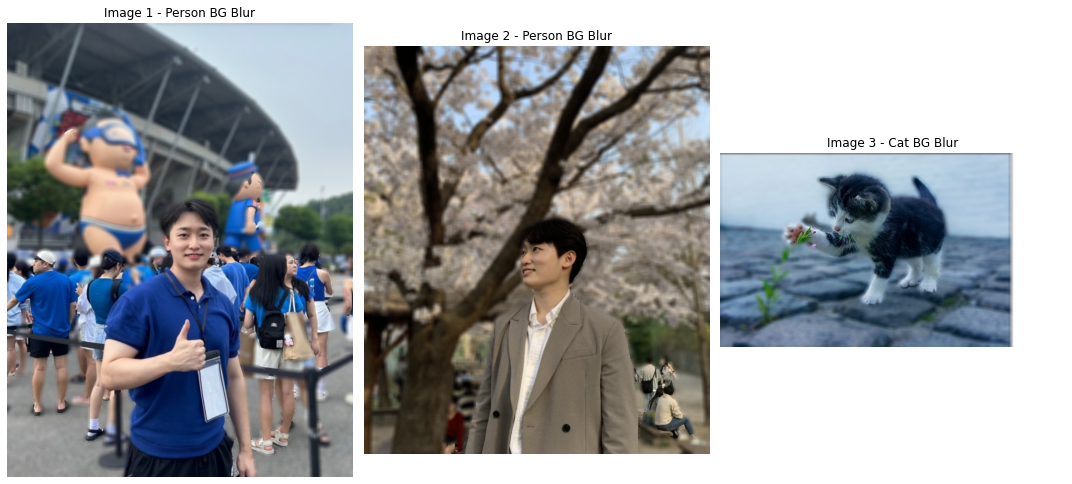

In [69]:
plt.figure(figsize=(15, 10))

for i in range(3):
    img_orig = img_list[i]
    output = output_list[i]
    target_color = target_colors[i]
    
    # 마스크 생성: 대상 객체 위치(True)
    seg_map = np.all(output == target_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255  # 255(객체), 0(배경)
    
    # 마스크를 컬러로 변환 (BGR 3채널)
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # 원본 이미지에 블러 처리
    img_orig_blur = cv2.blur(img_orig, (15, 15))

    # 마스크 반전 → 배경 부분이 255
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # 배경 부분만 블러 이미지에서 가져옴
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 객체 부분만 원본 이미지에서 가져옴
    img_fg = cv2.bitwise_and(img_orig, img_mask_color)

    # 전경과 배경을 합침
    final_img = cv2.add(img_fg, img_bg_blur)

    # 시각화
    plt.subplot(1, 3, i + 1)
    title_name = "Person" if i < 2 else "Cat"
    plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i + 1} - {title_name} BG Blur")
    plt.axis('off')

plt.tight_layout()
plt.show()

### np.where 쓰기!

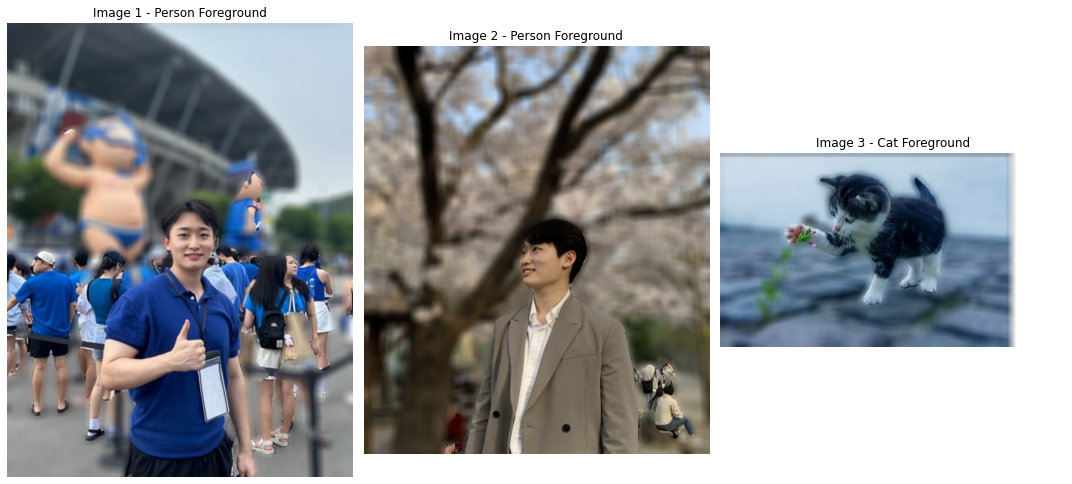

In [70]:
plt.figure(figsize=(15, 10))

for i in range(3):
    img_orig = img_list[i]            # 원본 이미지
    img_blur = blurred_imgs[i]        # 미리 만든 블러 처리 이미지
    output = output_list[i]           # segmentation 출력
    target_color = target_colors[i]   # 해당 이미지에 맞는 객체 색상

    # 객체 위치 마스크 생성 (True/False → 255/0)
    seg_map = np.all(output == target_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255
    
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # 객체는 원본, 나머지는 블러 처리 이미지 사용
    img_concat = np.where(img_mask_color == 255, img_orig, img_blur)

    # 시각화
    plt.subplot(1, 3, i + 1)
    title_name = "Person" if i < 2 else "Cat"
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i + 1} - {title_name} Foreground")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Step 2. 사진에서 문제점 찾기

- 아웃포커싱하면 뒷쪽에 있을 수록 더 blur 처리가 심해져야 하는데 그렇지 못했다.
- blur 선이 너무 직선적이다
- 사진이 작아서 잘 안보이네욥 ㅠㅠ
- 뒤에 인형도 사람으로 인식이됨 ㅋㅋㅋㅋ

# Step 3. 해결 방법을 제안해 보기

### 문제 요약
 
##### 현재 Semantic Segmentation을 기반으로 인물 모드를 구현할 경우 다음과 같은 문제가 발생:

  - 경계가 부정확함: 사람의 머리카락, 어깨, 손가락 등 섬세한 부분이 마스크에 잘 안 잡힘.  

  - 마스크 정확도 한계: background로 오인되어 인물 일부가 흐려지거나, background 일부가 또렷하게 남음.  

  - 2D 정보만 사용: 거리 정보를 모르기 때문에 피사계 심도(Depth of Field)를 흉내 내기 어려움.   

## 제안 솔루션: Depth Estimation + Semantic Segmentation 결합

### 딥러닝 기반의 Monocular Depth Estimation을 사용하여, Semantic Segmentation 마스크의 오류를 깊이 정보로 보정

1. **원본 이미지 입력**
2. **Semantic Segmentation (예: DeepLab)**
 - 주요 객체 클래스 추출 (예: person, cat 등)  
   
3. **초기 객체 마스크 생성**
  
4. **Monocular Depth Estimation 수행 (예: struct2depth)**
 - 이미지로부터 깊이(Depth) 정보 추정
   
5. **객체 마스크와 Depth Map 비교 및 보정**
 - 객체 마스크의 경계나 오류를 깊이 기반으로 정밀하게 수정
 
6. **정교한 최종 마스크 생성**
 - 깊이 + 세그멘테이션 기반 통합
 
7. **배경 블러(Blur) 처리**
 - 최종 마스크 외부 영역에만 블러 적용
 
8. **최종 이미지 출력**



---

### 메커니즘 상세 설명

1. **Semantic Segmentation**
   - 객체 클래스(person, cat 등)를 분리하여 마스크 생성
   - 하지만 경계선이 흐릿하거나 오류 가능성 존재

2. **Monocular Depth Estimation**
   - 단일 이미지로부터 픽셀 단위의 거리(깊이) 추정
   - 가까운 거리의 객체(사람/고양이 등)와 배경을 명확히 구분 가능

3. **두 결과 비교 및 보정**
   - 예: 세그멘테이션에서 누락된 사람 손 → depth map 상으로는 가까운 거리 → 마스크에 포함시킴
   - 반대로, 사람이 아닌데 세그멘테이션 오류로 포함된 영역이 먼 거리로 확인되면 제거

4. **정교한 마스크 기반 블러 처리**
   - 정제된 마스크 외의 영역만 Blur 적용
   - 추가적으로 깊이에 따라 Blur 강도 가중 적용도 가능

---

###  기대 효과

- 마스크 경계선의 부자연스러움 해결
- 실제 피사계 심도처럼 자연스러운 아웃포커싱 효과 구현
- 얼굴, 고양이 등 다양한 객체에도 확장 가능
- Depth 기반 처리라 배경이 자연스럽게 점진적으로 흐려짐

---

###  기술 스택 제안

| 기술                  | 목적                            |
|-----------------------|---------------------------------|
| DeepLabV3+            | Semantic Segmentation           |
| MiDaS or struct2depth | Depth Estimation (Monocular)    |
| OpenCV                | 마스크 적용 및 Blur 연산 수행  |

---

###  결론

단순한 2D Segmentation만으로는 피사계 심도에 따른 자연스러운 아웃포커싱을 구현하기 어렵습니다.  
따라서 **깊이 정보를 함께 사용하는 보정 로직**이 필요하며, 이를 통해 더 **정밀하고 자연스러운 인물 모드**를 구현할 수 있습니다.
